### Dataset description

The data set was taken from https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/data

The data set was created for learning purposes. Attributes: Customer ID, age, gender, annual income and spending score. Spending score is aasigned to a customer based on his behavior and purchasing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
DATASET = pd.read_csv(
    'Mall_Customers.csv',
    header=0,
    names=['customer_id', 'gender', 'age', 'annual_income', 'spending_score'],
    dtype={'age': np.int64, 'annual_income': np.int64}
)

In [3]:
DATASET.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
DATASET.isnull().sum().to_frame('Missing values in columns')

,Missing values in columns
customer_id,0
gender,0
age,0
annual_income,0
spending_score,0


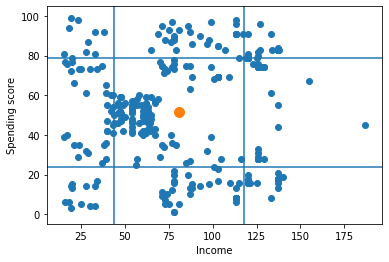

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def mean_std(series):
    return series.mean(), series.std()

income = DATASET['annual_income']
spending_score = DATASET['spending_score']

x_mean, x_std = mean_std(income)
y_mean, y_std = mean_std(spending_score)

plt.axvline(x_mean - x_std)
plt.axvline(x_mean + x_std)
plt.axhline(y_mean - y_std)
plt.axhline(y_mean + y_std)
plt.scatter(income, spending_score)
plt.scatter(x_mean, y_mean, s=100)
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.show()

In [6]:
X = DATASET.loc[:, ['annual_income', 'spending_score']]

### K-means

In [7]:
from sklearn.cluster import KMeans

In [8]:
def k_means(n):
    km = KMeans(n_clusters=n, init='k-means++', max_iter=300)
    return km.fit(X)

clustered_data = {}

for n in range(2, 11):
    clustered_data[n] = k_means(n)

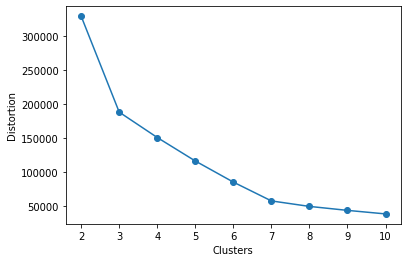

In [9]:
distortions = []

for cluster in clustered_data.values():
    distortions.append(cluster.inertia_)
    
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel ('Distortion')
plt.show() 

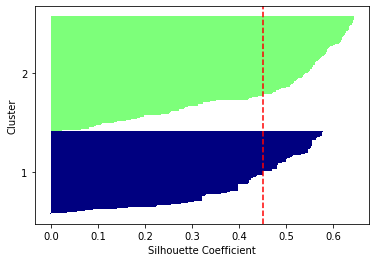

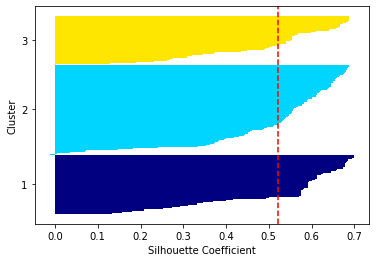

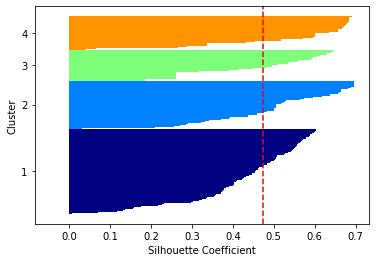

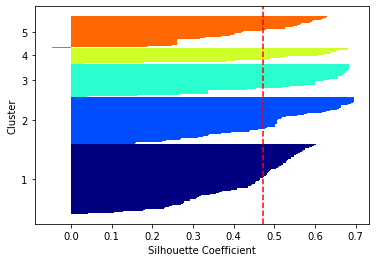

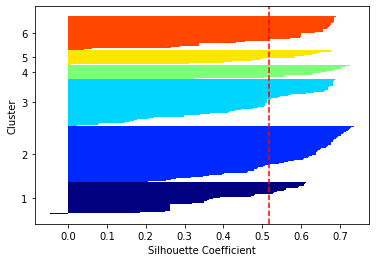

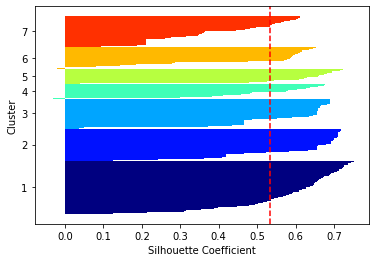

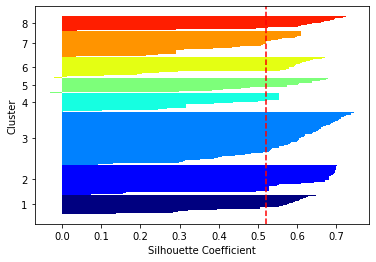

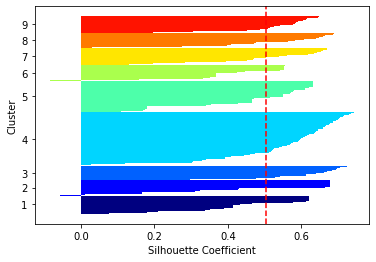

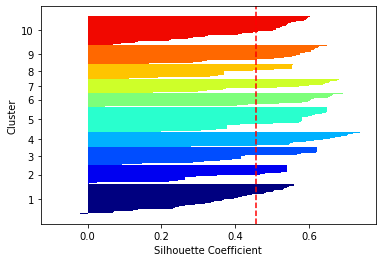

In [10]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def draw_cluster_silhouette(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300)
    y_km = km.fit_predict(X)
    
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        
        y_ax_upper += len(c_silhouette_vals)
        
        color = cm.jet(float(i) / n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper),
                c_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)
        
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    
    plt.axvline(silhouette_avg,
               color='red',
               linestyle='--')
    
    plt.yticks(yticks, cluster_labels + 1)
    
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    
    plt.show()
    
for n in range(2, 11):
    draw_cluster_silhouette(n)

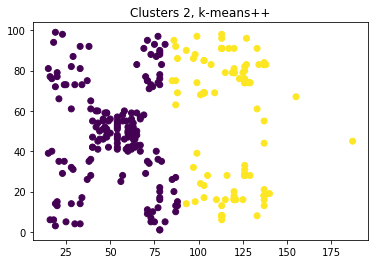

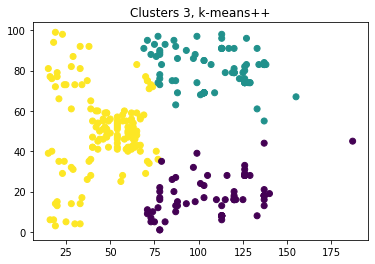

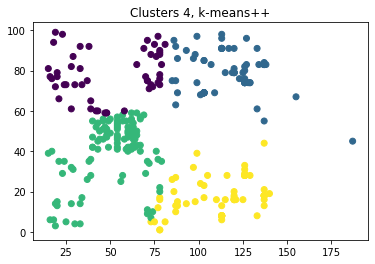

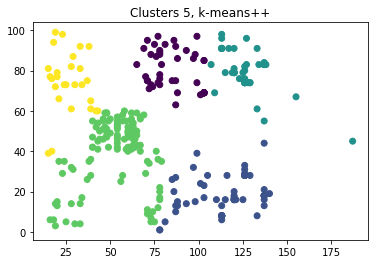

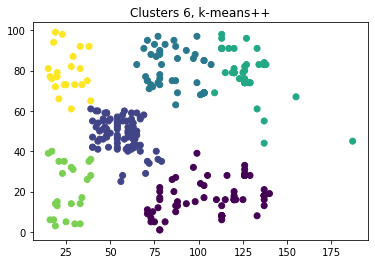

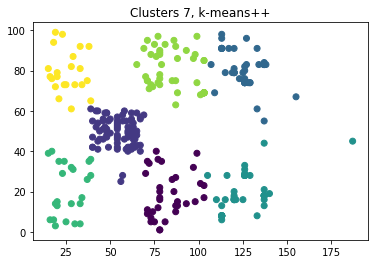

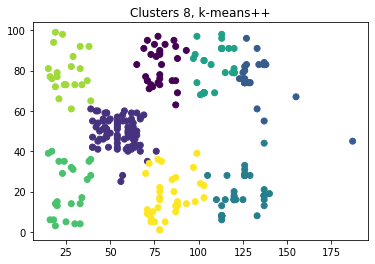

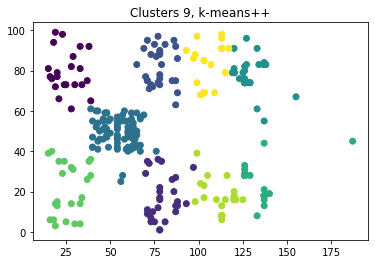

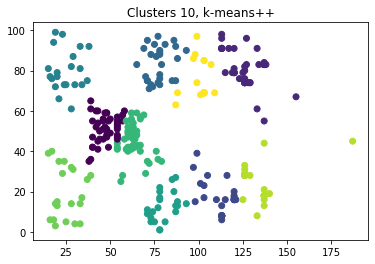

In [11]:
def highlight_clusters(x, y, labels):
    plt.scatter(x, y, c=labels)
    plt.show()
    
def draw_clusters(clustered_data, n):
    labels = clustered_data[n].labels_
    plt.title(f'Clusters {n}, k-means++')
    highlight_clusters(income, spending_score, labels)
    
for n in range(2, 11):
    draw_clusters(clustered_data, n)

### Hierarchical Clustering

In [12]:
from scipy.cluster import hierarchy
from seaborn import clustermap

In [13]:
def draw_dendrogram(method):
    dendrogram = hierarchy.dendrogram(
        hierarchy.linkage(
            X,
            method=method
        ),
        truncate_mode='lastp',
        p=15
    )
    plt.show()


def draw_heatmap(method):
    clustermap(X, method=method)
    plt.show()
    

def draw(method):
    draw_dendrogram(method)
    draw_heatmap(method)

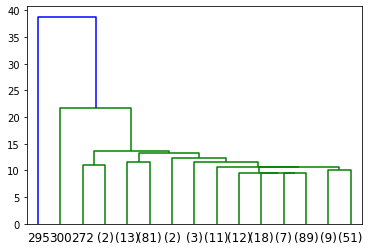

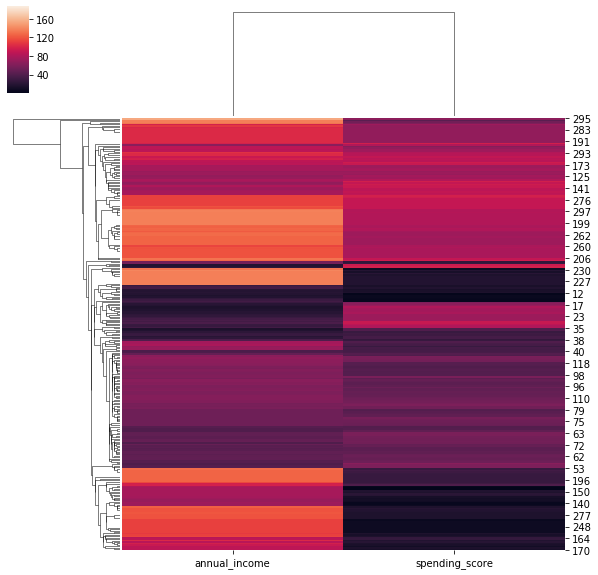

In [14]:
draw('single')

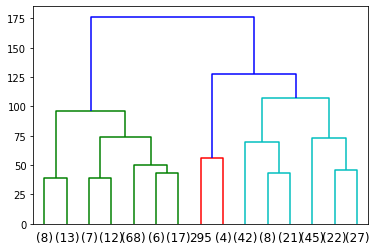

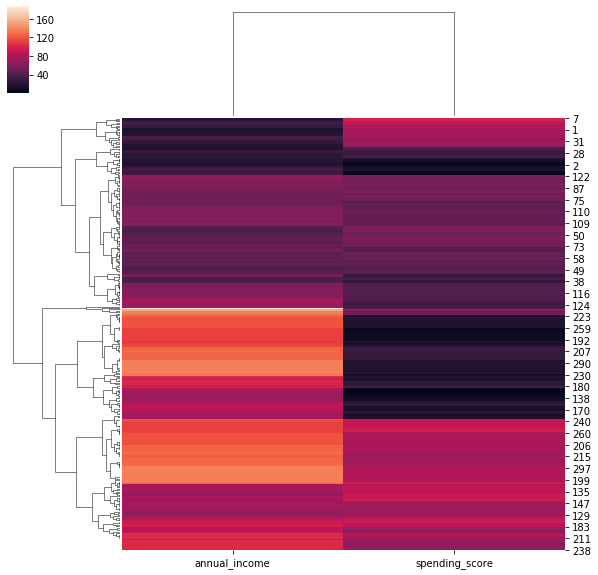

In [15]:
draw('complete')

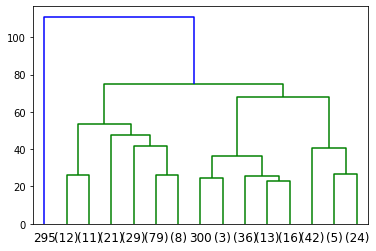

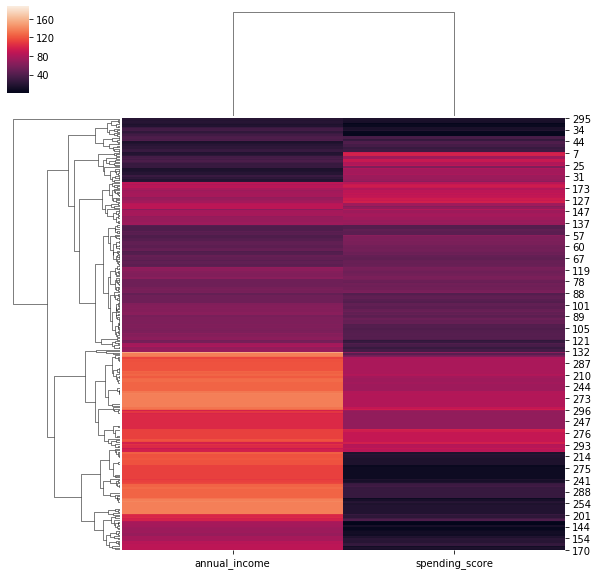

In [16]:
draw('average')

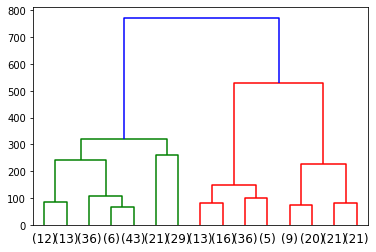

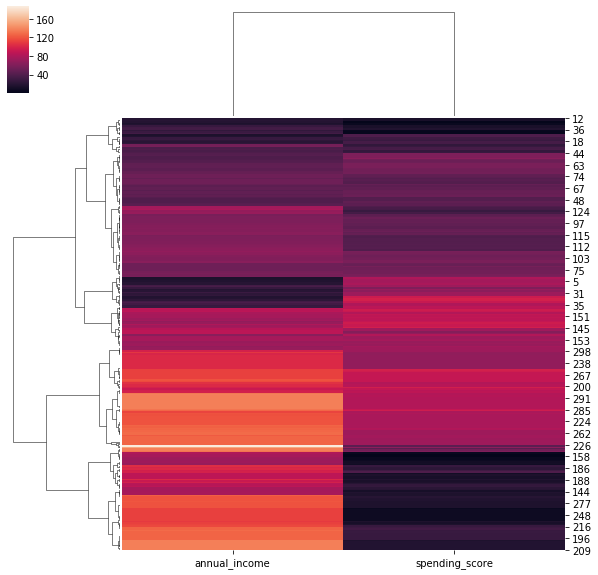

In [17]:
draw('ward')

### DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

In [19]:
x_pairwise_distances = pairwise_distances(X)

In [20]:
min_samples = 7
mean_distances = [
    sum(sorted(distances_for_point)[:min_samples])/min_samples
    for distances_for_point in x_pairwise_distances
]
mean_distances.sort()

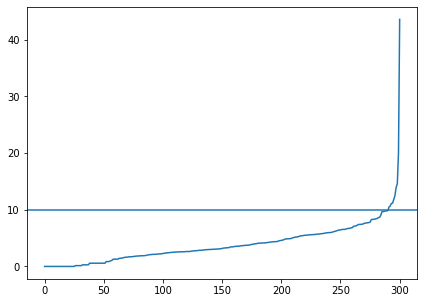

In [21]:
plt.figure(figsize=(7,5))
plt.plot(mean_distances)
plt.axhline(10)
plt.show()

In [22]:
def draw_clusters_for_eps(eps, x, y):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    _ = dbscan.fit(X)
    
    filtered_x = [x for i, x in enumerate(x) if dbscan.labels_[i] != -1]
    filtered_y = [x for i, x in enumerate(y) if dbscan.labels_[i] != -1]
    filtered_labels = [label for label in dbscan.labels_ if label != -1]
    
    highlight_clusters(filtered_x, filtered_y, filtered_labels)

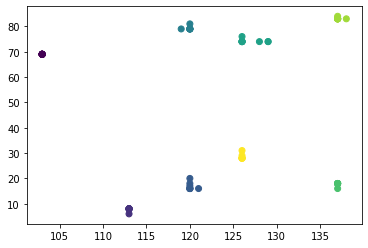

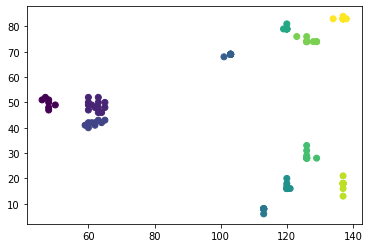

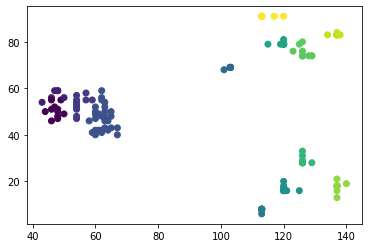

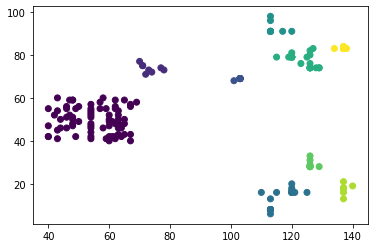

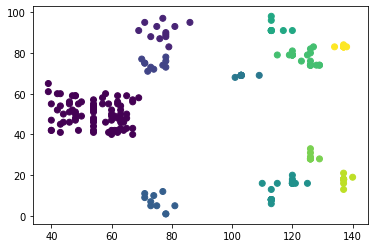

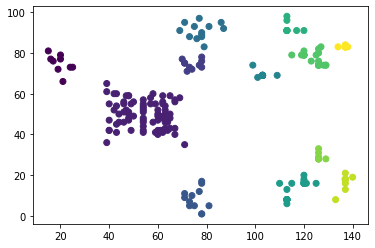

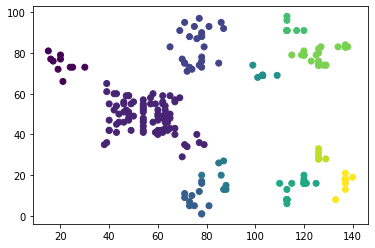

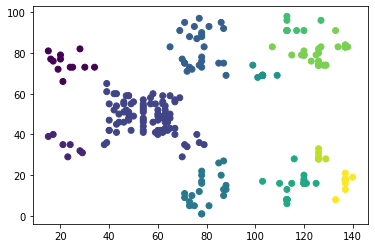

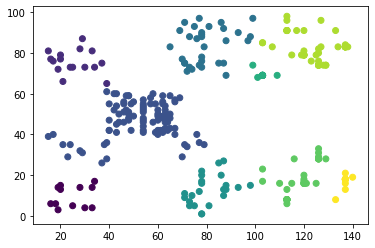

In [34]:
for n in range(2, 11):
    draw_clusters_for_eps(n, income, spending_score)

### Conclusion

In my opinion the best algorythm for this data set is k-means with 7 clusters.